# Opgave 4
# Opgave 4.1
Lav lasso regression på bilbasen-datasættet for at finde den parameter der er vigtigst for prisen

In [31]:
%matplotlib inline
import pandas as pd
data = pd.read_csv('../input/bilbasen_unformatet.csv', sep=';')
data = data.drop('CarName', axis=1)
data['HK'] = data['HK'].astype('float64')
data['Price'] = data['Price'].astype('float64')
data['Year'] = data['Year'].astype('float64')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HK          5440 non-null   float64
 1   KM          5440 non-null   float64
 2   KmPerLiter  5440 non-null   float64
 3   KMT         5440 non-null   float64
 4   Price       5440 non-null   float64
 5   Year        5440 non-null   float64
dtypes: float64(6)
memory usage: 255.1 KB


,HK,KM,KmPerLiter,KMT,Price,Year
0,90.0,171.0,22.2,10.7,49900.0,2008.0
1,99.0,310.0,20.4,11.7,129800.0,2015.0
2,147.0,90.0,15.2,9.7,179900.0,2014.0
3,163.0,89.0,19.2,9.8,239900.0,2014.0
4,136.0,250.0,18.9,10.1,299000.0,2014.0


In [40]:
cars_price = data['Price']
cars_parameters = data.drop('Price', axis=1)
cars_columns_names = cars_parameters.columns.values

In [41]:
print(cars_columns_names)

['HK' 'KM' 'KmPerLiter' 'KMT' 'Year']


In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(cars_parameters,cars_price)
lasso_coef = lasso.fit(cars_parameters,cars_price).coef_

In [37]:
range(len(cars_columns_names))

range(0, 5)

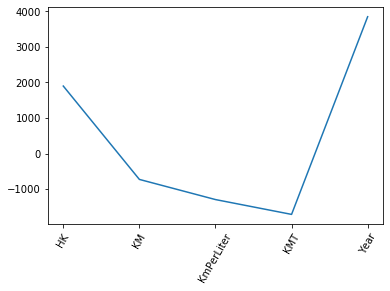

In [43]:
from matplotlib import pyplot as plt
plt.plot(range(len(cars_columns_names)),lasso_coef)
plt.xticks(range(len(cars_columns_names)), cars_columns_names, rotation=60)
plt.show()

# Opgave 4.2
`Opsæt en KNN-regressor med k på 3, på bil-basen-sættet, og lav en confusion matrix`
- bemærk at jeg ikke har brugt KNN-Regressor, men KNNClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(cars_parameters,cars_price, test_size=0.2,random_state=42)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81        16
      9000.0       0.75      1.00      0.86         3
      9900.0       0.00      0.00      0.00         0
     22900.0       0.92      1.00      0.96        12
     23900.0       0.00      0.00      0.00         1
     24000.0       0.00      0.00      0.00         0
     24900.0       0.00      0.00      0.00         1
     29900.0       1.00      0.94      0.97        17
     34800.0       0.50      1.00      0.67         1
     34900.0       0.77      1.00      0.87        10
     34999.0       0.00      0.00      0.00         0
     37900.0       0.82      1.00      0.90         9
     38500.0       0.00      0.00      0.00         1
     39800.0       0.00      0.00      0.00         0
     39900.0       1.00      0.64

c:\users\jespe\.virtualenvs\machinelearningnotebook-qxxtnzx7\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jespe\.virtualenvs\machinelearningnotebook-qxxtnzx7\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Opgave 4.3
`Forklar begreberne Precision og recall`
- precision: (PPV / Positive Predictive Value) 
  - (antal true positive) / (antal true positive + antal falske positive)
  - En højere værdi betyder et bedre resultat. Der er et lavt antal af falske positive.
  - Ved et lavere tal betyder det at modellen oftere predicter/giver en forkert label
- recall: (sensitivity, hit rate eller TPR/True positive rate) 
  - (antal true positive) / (antal true positive + antal falske negative)
  - jo højere værdi des flere korrekte predictions. Der er et lavt antal falske negative
  - Siger noget om modellens følsomhed. 



